<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
pip install --upgrade category_encoders

  Using cached category_encoders-2.1.0-py2.py3-none-any.whl (100 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
##### Your Code Here #####

#Packages for KNeighborsRegressor model
import category_encoders as ce
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Packages for neural network model
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [5]:
#Checking data set shape
for i in X_train, y_train, X_test, y_test:
    print(i.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [6]:
X_train[:10]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01],
       [2.83920e-01, 0.00000e+

In [7]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [21]:
#KNeighborsRegressor model
KNR = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(leaf_size=30, n_neighbors=20 , n_jobs=1)
)
#Fit the model
KNR.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=1, n_neighbors=20, p=2,
                                     weights='uniform'))],
         verbose=False)

In [29]:
#Accuracy score
y_pred = KNR.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
ac = KNR.score(X_test, y_test)

print(f'The accuracy score using KNeighborsRegressor is {ac}, Mean Squared Error is {mse}')

The accuracy score using KNeighborsRegressor is 0.7262209788711986, Mean Squared Error is 22.79041936274509


In [30]:
#Scale and fit data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [34]:
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [52]:
#Neural Network framework
model = Sequential()
model.add(Dense(128, input_shape = [X_train.shape[1]], activation='selu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 0s 2ms/sample - loss: 533.9118 - mse: 533.9118 - mae: 21.2683 - val_loss: 544.3128 - val_mse: 544.3129 - val_mae: 21.6724
Epoch 2/50
323/323 [==============================] - 0s 87us/sample - loss: 445.7969 - mse: 445.7969 - mae: 19.3336 - val_loss: 443.5097 - val_mse: 443.5097 - val_mae: 19.3497
Epoch 3/50
323/323 [==============================] - 0s 87us/sample - loss: 340.1158 - mse: 340.1158 - mae: 16.6217 - val_loss: 323.2161 - val_mse: 323.2161 - val_mae: 15.9608
Epoch 4/50
323/323 [==============================] - 0s 90us/sample - loss: 221.9175 - mse: 221.9175 - mae: 12.8732 - val_loss: 202.2982 - val_mse: 202.2982 - val_mae: 11.4090
Epoch 5/50
323/323 [==============================] - 0s 83us/sample - loss: 124.9470 - mse: 124.9470 - mae: 8.9393 - val_loss: 131.9155 - val_mse: 131.9155 - val_mae: 8.6763
Epoch 6/50
323/323 [==============================] - 0s 80us/sample - lo

In [56]:
score = model.evaluate(X_test, y_test)
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {score[0]}")
print(f"{model.metrics_names[1]}: {score[1]}")
print(f"{model.metrics_names[2]}: {score[2]}")

102/102 [==============================] - 0s 58us/sample - loss: 17.8519 - mse: 17.8519 - mae: 2.9920
Validation Data Metrics:
loss: 17.851917266845703
mse: 17.851917266845703
mae: 2.992023468017578


In [57]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 0s 130us/sample - loss: 11.0155 - mse: 11.0155 - mae: 2.3526 - val_loss: 21.1434 - val_mse: 21.1434 - val_mae: 3.2988
Epoch 2/50
323/323 [==============================] - 0s 90us/sample - loss: 10.9219 - mse: 10.9219 - mae: 2.3462 - val_loss: 20.7881 - val_mse: 20.7881 - val_mae: 3.2544
Epoch 3/50
323/323 [==============================] - 0s 74us/sample - loss: 10.9138 - mse: 10.9138 - mae: 2.2739 - val_loss: 20.9041 - val_mse: 20.9041 - val_mae: 3.2286
Epoch 4/50
323/323 [==============================] - 0s 74us/sample - loss: 10.3359 - mse: 10.3359 - mae: 2.2764 - val_loss: 21.2892 - val_mse: 21.2892 - val_mae: 3.2130
Epoch 5/50
323/323 [==============================] - 0s 77us/sample - loss: 10.6894 - mse: 10.6894 - mae: 2.2755 - val_loss: 20.0023 - val_mse: 20.0023 - val_mae: 3.0990
Epoch 6/50
323/323 [==============================] - 0s 71us/sample - loss: 11.0964 - mse: 11.0964

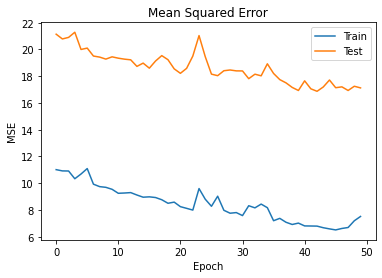

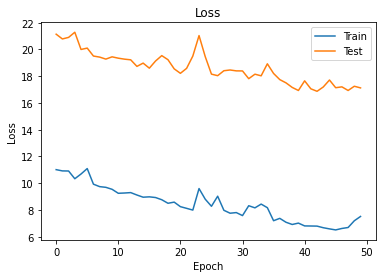

In [61]:
#Plot training and validation accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

#Plot training and loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [99]:
##### Your Code Here #####
#Load data
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [100]:
for data in x_train, y_train, x_test, y_test:
    print(data.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [101]:
#Reshape data
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
#Data normalization
x_train = x_train/255
x_test = x_test/255

In [114]:
#Build a neral network model

model = Sequential([
    Flatten(),
    Dense(16, input_dim=784, activation='selu'),
    Dropout(.2),
    Dense(16, activation='relu'),
    Dropout(.2),
    Dense(16, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['mse', 'accuracy'])
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 57us/sample - loss: 1.4252 - mse: 27.7041 - accuracy: 0.4770 - val_loss: 0.8029 - val_mse: 27.3639 - val_accuracy: 0.7345
Epoch 2/100
48000/48000 [==============================] - 2s 50us/sample - loss: 1.0163 - mse: 27.7197 - accuracy: 0.6057 - val_loss: 0.6648 - val_mse: 27.3721 - val_accuracy: 0.7714
Epoch 3/100
48000/48000 [==============================] - 2s 49us/sample - loss: 0.8958 - mse: 27.7246 - accuracy: 0.6549 - val_loss: 0.6121 - val_mse: 27.3758 - val_accuracy: 0.7857
Epoch 4/100
48000/48000 [==============================] - 2s 47us/sample - loss: 0.8267 - mse: 27.7278 - accuracy: 0.6890 - val_loss: 0.5835 - val_mse: 27.3776 - val_accuracy: 0.7924
Epoch 5/100
48000/48000 [==============================] - 2s 48us/sample - loss: 0.7884 - mse: 27.7300 - accuracy: 0.7060 - val_loss: 0.5486 - val_mse: 27.3813 - val_accuracy: 0.7990
Epoch 6/100
48000/48000 [=====

In [115]:
score = model.evaluate(x_test, y_test)
print("Validation Data Metrics:")
print(f'{model.metrics_names[0]}: {score[0]}')
print(f'{model.metrics_names[1]}: {score[1]}')
print(f'{model.metrics_names[2]}: {np.round(score[2]*100)}%')

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4496 - mse: 27.6769 - accuracy: 0.8414
Validation Data Metrics:
loss: 0.4496271329402924
mse: 27.676891326904297
accuracy: 84.0%


In [116]:
history.history.keys()

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])

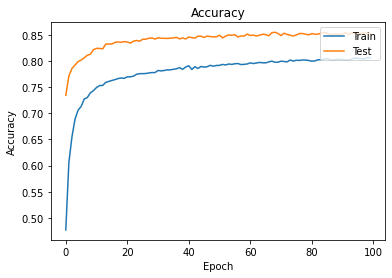

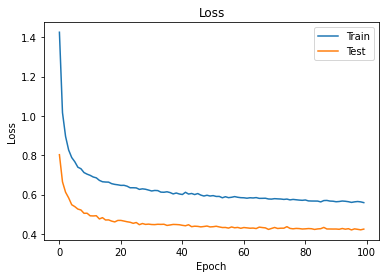

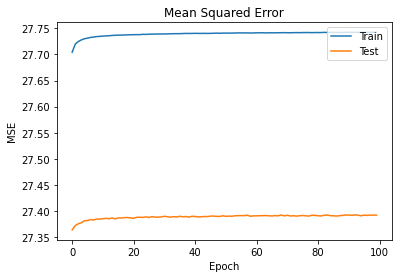

In [118]:
#Plot validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

#Plot validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

#Plot validation loss
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.